# CapsNets on Fashion Cifar-10 dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_cifar_10

In [3]:
(X_train, y_train), (X_test , y_test) = load_cifar_10(size=(1024, 512))
X_train.shape, y_train.shape

(TensorShape([1024, 32, 32, 3]), (1024,))

1024 images of size 32x32 over three channel

## Sample visualisation

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

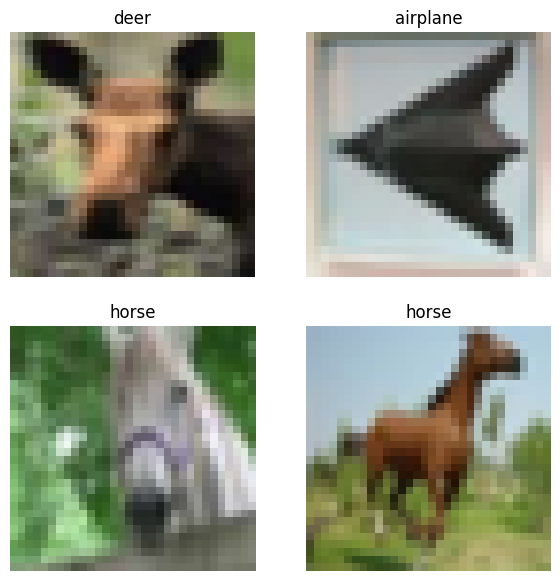

In [5]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [6]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [7]:
params = {
    "epochs": 20,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 256,
    "no_of_primary_capsules": 18,
    "primary_capsule_vector": 8,
    "no_of_secondary_capsules": 10,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = "CapsNet-CIFAR-10"
model.compile()
model.summary()

Model: "CapsNet-CIFAR-10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'f1', 'precision', 'recall'])

Epoch 1/20: 100%|██████████| 16/16 [00:12<00:00,  2.14it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 2/20: 100%|██████████| 16/16 [00:07<00:00,  2.00it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 3/20: 100%|██████████| 16/16 [00:07<00:00,  2.16it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is il

{'accuracy': ListWrapper([0.1083984375, 0.1044921875, 0.16015625, 0.2265625, 0.1982421875, 0.2724609375, 0.2734375, 0.3232421875, 0.3330078125, 0.353515625, 0.3671875, 0.3671875, 0.3818359375, 0.431640625, 0.45703125, 0.44921875, 0.494140625, 0.509765625, 0.4990234375, 0.5263671875]),
 'f1': ListWrapper([0.030471297402626406, 0.025542780264924715, 0.08372543530864288, 0.136689690826018, 0.15536445145983888, 0.22093666644765866, 0.2198023723789961, 0.28294864027347966, 0.2915289902205861, 0.3285512449919901, 0.34791460981943473, 0.34107791097933393, 0.3548371956882123, 0.4111643784853204, 0.45150157627896803, 0.42947628940217014, 0.4860475290351232, 0.49843863572808284, 0.4866127157210294, 0.519884486221232]),
 'precision': ListWrapper([0.02170210968693686, 0.02950314792230451, 0.2036920638394213, 0.182520915613563, 0.22793750513041547, 0.30731860246962284, 0.2406853593279642, 0.3485661990980105, 0.3422907124224178, 0.3881262606947654, 0.3923022602517293, 0.4337173268347023, 0.423891000

In [9]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-CIFAR-10/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-CIFAR-10/assets


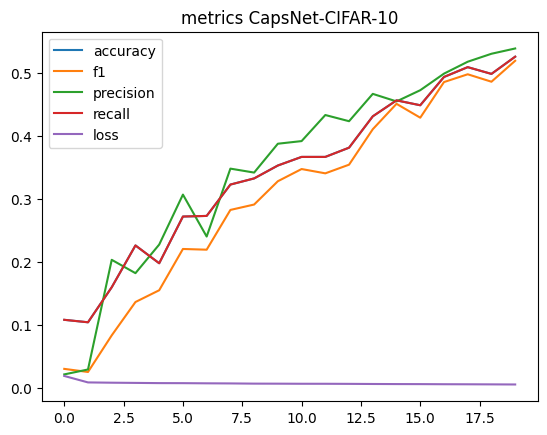

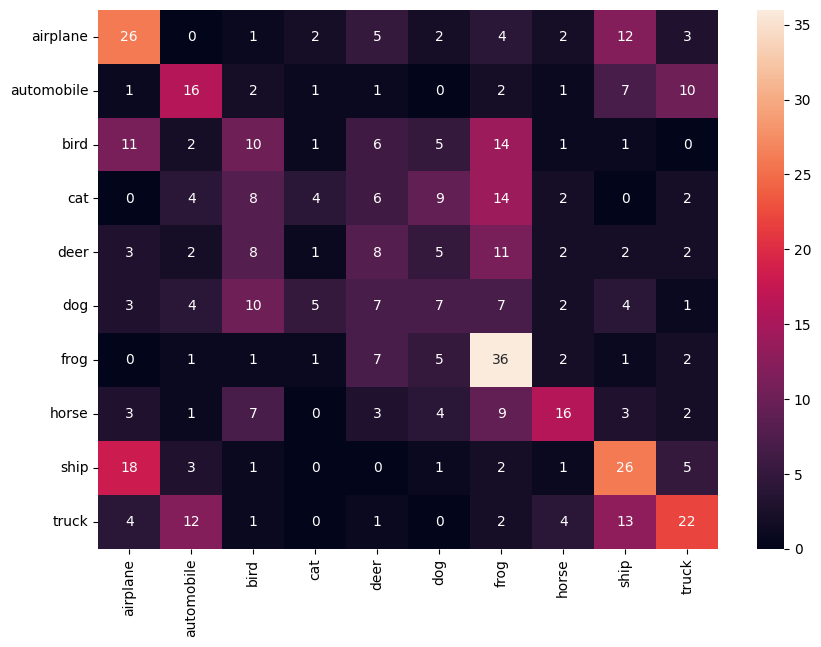

In [10]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-CIFAR-10', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-CIFAR-10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  62464     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2986128   
                                                                 
 dense_2 (Dense)             multiple                  82432     
                                                                 
 dense_3 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  1049600   
                                                                 
Total params: 6,180,496
Trainable params: 6,180,496
Non-trainable params: 0
_________________________________________________________________
